In [1]:
!unzip -q /content/PhotosForData.zip -d /content/PhotosForData


In [2]:
import pandas as pd

# Replace 'your_file.csv' with the path to your uploaded file
df = pd.read_csv('/content/HumaticData.csv')

# Display the columns
print("Columns in the CSV file:")
print(df.columns)


Columns in the CSV file:
Index(['_id', 'linkedinUrl', 'agreeableness_score', 'agreeableness_level',
       'conscientiousness_score', 'conscientiousness_level',
       'emotional_stability_score', 'emotional_stability_level',
       'extraversion_score', 'extraversion_level', 'openness_score',
       'openness_level', 'calculativeness_score', 'calculativeness_level',
       'dominance_score', 'dominance_level', 'influence_score',
       'influence_level', 'steadiness_score', 'steadiness_level',
       'disc_summary_label', 'ocean_summary_label', 'id'],
      dtype='object')


In [3]:

# Define the chttps://files.slack.com/files-pri/T071149K94Y-F0838MAD5PB/download/photosfordata.zip?origin_team=T071149K94Yolumns to keep
columns_to_keep = [
    '_id', 'id',
    'agreeableness_score', 'agreeableness_level',
    'conscientiousness_score', 'conscientiousness_level',
    'emotional_stability_score', 'emotional_stability_level',
    'extraversion_score', 'extraversion_level',
    'openness_score', 'openness_level'
]

# Filter the DataFrame to keep only these columns
df_filtered = df[columns_to_keep]

# Display the filtered DataFrame
print("Filtered DataFrame:")
print(df_filtered.head())


Filtered DataFrame:
                        _id  id  agreeableness_score agreeableness_level  \
0  66cc9e6c5e4195f6ea085d74   1                 5.73  Somewhat Agreeable   
1  66cca050aa7f584274c4b115   2                 6.52           Agreeable   
2  66cca12faa7f584274c4b11c   3                 5.89  Somewhat Agreeable   
3  66cca15aaa7f584274c4b123   4                 6.51           Agreeable   
4  66cca1d7aa7f584274c4b133   5                 7.12           Agreeable   

   conscientiousness_score conscientiousness_level  emotional_stability_score  \
0                     6.52           Conscientious                       3.13   
1                     7.65           Conscientious                       4.97   
2                     6.65           Conscientious                       3.41   
3                     7.15           Conscientious                       5.12   
4                     6.78           Conscientious                       2.14   

  emotional_stability_level  extrave

In [4]:
import pandas as pd
from PIL import Image, UnidentifiedImageError
import os

# Define the folder containing the images
image_folder = "/content/PhotosForData"

# Combine _id with folder path to create the full image path
df_filtered['image_path'] = df_filtered['_id'].apply(lambda x: os.path.join(image_folder, f"{x}.jpg"))

# Display all traits along with the images
for index, row in df_filtered.iterrows():
    try:
        # Read the image
        image = Image.open(row['image_path'])

        # Display all personality traits
        print("="*50)
        print(f"Image for _id {row['_id']} loaded successfully.")
        print(f"Image Path: {row['image_path']}")
        print(f"Agreeableness Score: {row['agreeableness_score']} | Level: {row['agreeableness_level']}")
        print(f"Conscientiousness Score: {row['conscientiousness_score']} | Level: {row['conscientiousness_level']}")
        print(f"Emotional Stability Score: {row['emotional_stability_score']} | Level: {row['emotional_stability_level']}")
        print(f"Extraversion Score: {row['extraversion_score']} | Level: {row['extraversion_level']}")
        print(f"Openness Score: {row['openness_score']} | Level: {row['openness_level']}")
        print("="*50)

        # Optionally display the image (comment out in non-GUI environments)
        image.show()
    except FileNotFoundError:
        print(f"Image for _id {row['_id']} not found at {row['image_path']}.")
    except UnidentifiedImageError:
        print(f"Image for _id {row['_id']} could not be identified as a valid image at {row['image_path']}.")


<ipython-input-4-e1468df41485>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['image_path'] = df_filtered['_id'].apply(lambda x: os.path.join(image_folder, f"{x}.jpg"))


Image for _id 66cc9e6c5e4195f6ea085d74 loaded successfully.
Image Path: /content/PhotosForData/66cc9e6c5e4195f6ea085d74.jpg
Agreeableness Score: 5.73 | Level: Somewhat Agreeable
Conscientiousness Score: 6.52 | Level: Conscientious
Emotional Stability Score: 3.13 | Level: Very Sensitive
Extraversion Score: 7.26 | Level: Extroverted
Openness Score: 5.37 | Level: Somewhat Open
Image for _id 66cca050aa7f584274c4b115 loaded successfully.
Image Path: /content/PhotosForData/66cca050aa7f584274c4b115.jpg
Agreeableness Score: 6.52 | Level: Agreeable
Conscientiousness Score: 7.65 | Level: Conscientious
Emotional Stability Score: 4.97 | Level: Sensitive
Extraversion Score: 7.27 | Level: Extroverted
Openness Score: 4.88 | Level: Closed
Image for _id 66cca12faa7f584274c4b11c loaded successfully.
Image Path: /content/PhotosForData/66cca12faa7f584274c4b11c.jpg
Agreeableness Score: 5.89 | Level: Somewhat Agreeable
Conscientiousness Score: 6.65 | Level: Conscientious
Emotional Stability Score: 3.41 | Le

In [4]:
import pandas as pd
import os
import numpy as np
from PIL import Image, UnidentifiedImageError

# Define the folder containing the images
image_folder = "/content/PhotosForData"

df_filtered.loc[:, 'image_path'] = df_filtered['_id'].apply(lambda x: os.path.join(image_folder, f"{x}.jpg"))

# Drop rows where images are missing or corrupted
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    try:
        image = Image.open(image_path).convert("RGB")
        image = image.resize(target_size)
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        return image
    except (UnidentifiedImageError, FileNotFoundError) as e:
        print(f"Error loading image {image_path}: {e}")
        return None

X = []
y = []
for index, row in df_filtered.iterrows():
    image = load_and_preprocess_image(row['image_path'])
    if image is not None:
        X.append(image)
        y.append([
            row['agreeableness_score'],
            row['conscientiousness_score'],
            row['emotional_stability_score'],
            row['extraversion_score'],
            row['openness_score'],
        ])

X = np.array(X)
y = np.array(y)

print(f"Total valid images: {len(X)}")


<ipython-input-4-8fba20237af5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'image_path'] = df_filtered['_id'].apply(lambda x: os.path.join(image_folder, f"{x}.jpg"))


Error loading image /content/PhotosForData/66cca1d7aa7f584274c4b133.jpg: [Errno 2] No such file or directory: '/content/PhotosForData/66cca1d7aa7f584274c4b133.jpg'
Error loading image /content/PhotosForData/66cca292bd9c7b6148d8920e.jpg: [Errno 2] No such file or directory: '/content/PhotosForData/66cca292bd9c7b6148d8920e.jpg'
Error loading image /content/PhotosForData/66cd98f1d19ddaa7ff871c39.jpg: [Errno 2] No such file or directory: '/content/PhotosForData/66cd98f1d19ddaa7ff871c39.jpg'
Error loading image /content/PhotosForData/66cda4b49f8f86429aa60dd2.jpg: [Errno 2] No such file or directory: '/content/PhotosForData/66cda4b49f8f86429aa60dd2.jpg'
Error loading image /content/PhotosForData/66cdc2389f8f86429aa60f24.jpg: [Errno 2] No such file or directory: '/content/PhotosForData/66cdc2389f8f86429aa60f24.jpg'
Error loading image /content/PhotosForData/66cdca599f8f86429aa60f54.jpg: [Errno 2] No such file or directory: '/content/PhotosForData/66cdca599f8f86429aa60f54.jpg'
Error loading im

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - loss: 0.4225 - mae: 0.5035 - val_loss: 0.1174 - val_mae: 0.2815
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - loss: 0.1592 - mae: 0.3258 - val_loss: 0.0920 - val_mae: 0.2574
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - loss: 0.1143 - mae: 0.2793 - val_loss: 0.0843 - val_mae: 0.2494
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 0.1066 - mae: 0.2684 - val_loss: 0.0843 - val_mae: 0.2509
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - loss: 0.1005 - mae: 0.2654 - val_loss: 0.0846 - val_mae: 0.2514
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - loss: 0.0988 - mae: 0.2662 - val_loss: 0.0848 - val_mae: 0.2516
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 0.0967 - mae: 0.2634 - val_loss: 0.0839 - val_mae: 0.2500
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - loss: 0.0950 - mae: 0.2610 - val_loss: 0.0860 - val_mae: 0.2514
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - lo

Model saved as 'personality_model.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


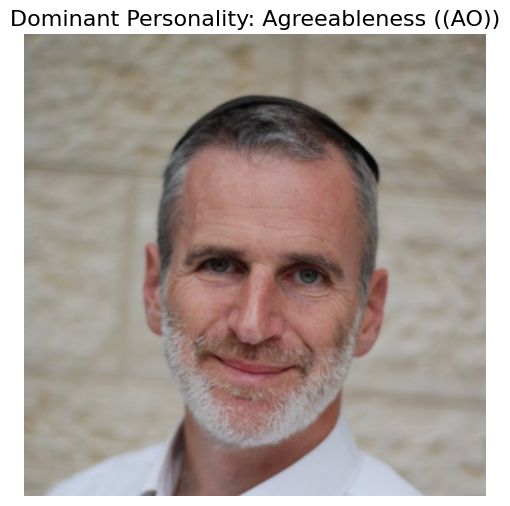

Personality Trait Scores:
Agreeableness (AO): 0.59
Conscientiousness (VS): 0.39
Emotional Stability (SC): 0.51
Extraversion (IE): 0.50
Openness (OP): 0.56


In [6]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Train and Save the Model
def train_and_save_model(X_train, y_train, X_val, y_val):
    # Define the model using VGG16
    base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze the base model layers

    # Add custom layers for regression
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation="relu"),
        Dropout(0.3),
        Dense(5, activation="linear")  # Linear activation for regression
    ])

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="mean_squared_error",  # Regression task
        metrics=["mae"]  # Mean Absolute Error for evaluation
    )

    # Data augmentation
    data_gen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode="nearest"
    )

    # Train the model
    history = model.fit(
        data_gen.flow(X_train, y_train, batch_size=16),
        validation_data=(X_val, y_val),
        epochs=20,
        verbose=1,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )

    # Save the model
    model.save("personality_model.h5")
    print("Model saved as 'personality_model.h5'")

# Step 2: Load the Model for Testing
def load_trained_model():
    return load_model("personality_model.h5")

# Step 3: Preprocess and Predict
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    try:
        image = Image.open(image_path).convert("RGB")
        image = image.resize(target_size)
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        return image
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

def predict_personality(model, image_path):
    image = load_and_preprocess_image(image_path)
    if image is None:
        return None
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image)
    return prediction

# Step 4: Display Results
def display_results(image_path, prediction):
    # Define trait names
    trait_names = ["Agreeableness (AO)", "Conscientiousness (VS)",
                   "Emotional Stability (SC)", "Extraversion (IE)", "Openness (OP)"]

    # Find the dominant trait
    dominant_trait_index = np.argmax(prediction[0])
    dominant_trait = trait_names[dominant_trait_index]

    # Display the image with scores and dominant trait
    plt.figure(figsize=(6, 6))
    plt.imshow(Image.open(image_path))
    plt.axis('off')
    plt.title(f"Dominant Personality: {dominant_trait.split()[0]} ({dominant_trait.split()[1]})", fontsize=16)
    plt.show()

    # Print all trait scores
    print("Personality Trait Scores:")
    for trait, score in zip(trait_names, prediction[0]):
        print(f"{trait}: {score:.2f}")

# Example Workflow
if __name__ == "__main__":
    # Assuming X, y are prepared earlier
    # X: Array of image data, y: Array of corresponding trait scores
    # Ensure the labels `y` are normalized between 0 and 1 if using linear activation
    X = np.random.rand(402, 224, 224, 3)  # Replace with actual image data
    y = np.random.rand(402, 5)  # Replace with actual target scores

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and save the model
    train_and_save_model(X_train, y_train, X_val, y_val)

    # Load the trained model
    model = load_trained_model()

    # Test with a new image
    test_image_path = "/content/PhotosForData/66cc9e6c5e4195f6ea085d74.jpg"  # Replace with your test image path
    prediction = predict_personality(model, test_image_path)

    # Display results
    if prediction is not None:
        display_results(test_image_path, prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


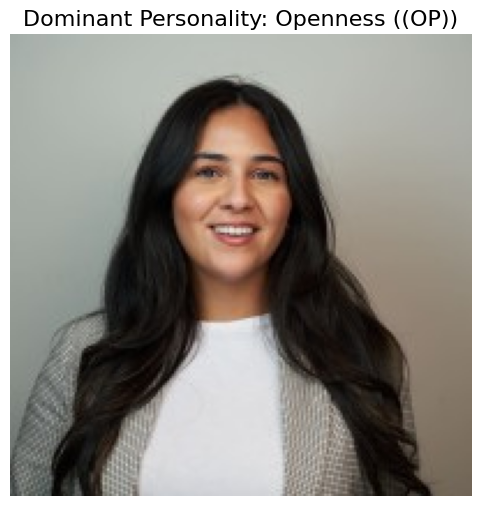

Personality Trait Scores:
Agreeableness (AO): 0.58
Conscientiousness (VS): 0.53
Emotional Stability (SC): 0.62
Extraversion (IE): 0.56
Openness (OP): 0.66


In [7]:
    # Test with a new image
    test_image_path = "/content/PhotosForData/66e7dd688890dbea297bc21b.jpg"  # Replace with your test image path
    prediction = predict_personality(model, test_image_path)

    # Display results
    if prediction is not None:
        display_results(test_image_path, prediction)